A demo for LROSE Kick of meeting

In [1]:
#Import the code we need
from datetime import datetime
import os
import tempfile

from boto.s3.connection import S3Connection
import cartopy
import matplotlib.patheffects as mpatheffects
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np
import pytz
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

import pyart


%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:26.363948. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Simple reading of an IRIS file

In [2]:
radar = pyart.io.read('/data/xsapr_test_case/XSW170329000004.RAWG6E5')

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:34.868112. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [3]:
print(radar.fields.keys())
print(radar.fields['reflectivity']['data'].shape)

dict_keys(['differential_reflectivity', 'cross_correlation_ratio', 'spectrum_width', 'velocity', 'differential_phase', 'reflectivity', 'specific_differential_phase', 'total_power', 'normalized_coherent_power'])
(9200, 501)


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:35.980971. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


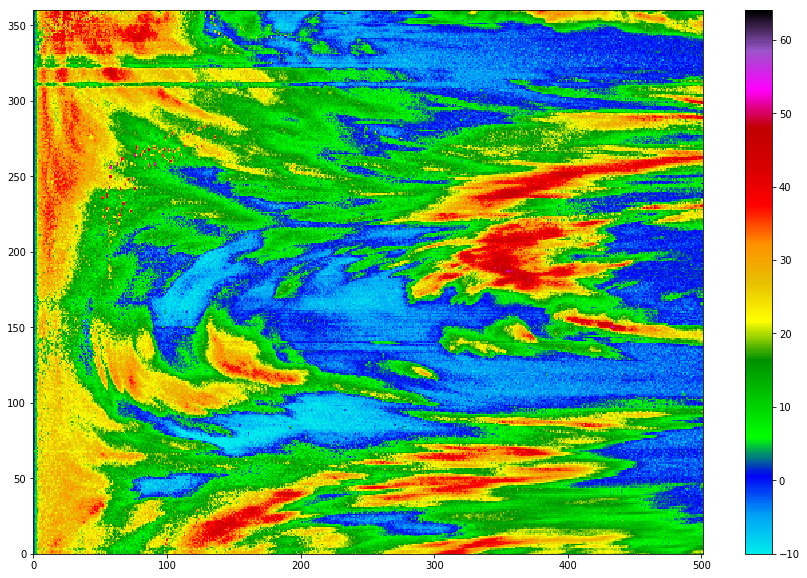

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:35.994022. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [4]:
fig = plt.figure(figsize = [15,10])
plt.pcolor(radar.fields['reflectivity']['data'][0:360,:], 
           vmin =-10, vmax=64, cmap = pyart.graph.cm.NWSRef)
plt.colorbar()

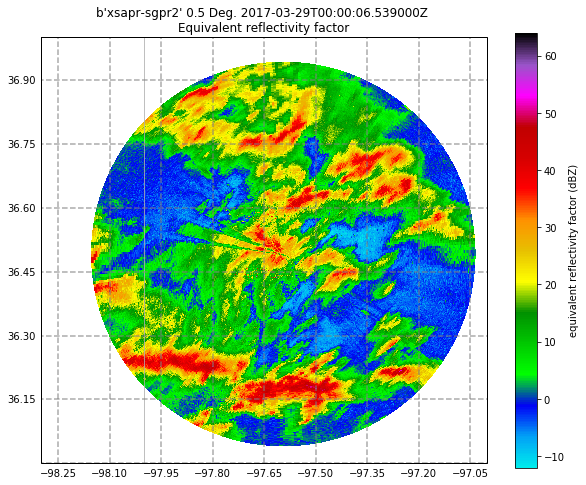

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:43.110987. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [5]:
fig = plt.figure(figsize = [10,8])

max_lat = 37
min_lat = 36
min_lon = -98.3
max_lon = -97

lal = np.arange(min_lat, max_lat, .2)
lol = np.arange(min_lon, max_lon, .2)

display = pyart.graph.RadarMapDisplayCartopy(radar)

projection = cartopy.crs.Mercator(
                central_longitude=(min_lon+max_lon)/2.0,
                min_latitude=min_lat, max_latitude=max_lat)

display.plot_ppi_map(
    'reflectivity', 0, colorbar_flag=True,
    projection=projection,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-12, vmax=64)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False



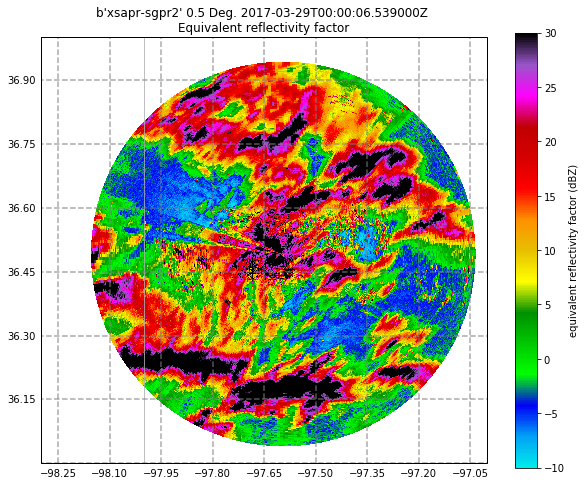

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:45.009806. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [6]:
fig = plt.figure(figsize = [10,8])

max_lat = 37
min_lat = 36
min_lon = -98.3
max_lon = -97

lal = np.arange(min_lat, max_lat, .2)
lol = np.arange(min_lon, max_lon, .2)

display = pyart.graph.RadarMapDisplayCartopy(radar)

projection = cartopy.crs.Mercator(
                central_longitude=(min_lon+max_lon)/2.0,
                min_latitude=min_lat, max_latitude=max_lat)

display.plot_ppi_map(
    'total_power', 0, colorbar_flag=True,
    projection=projection,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-10, vmax=30)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False



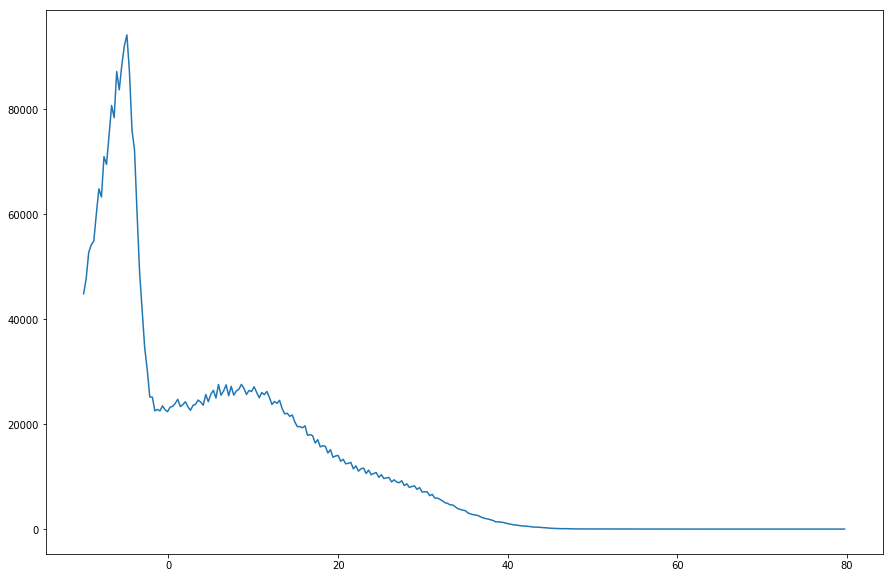

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:46.896076. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [7]:
power_hist, edges = np.histogram(radar.fields['total_power']['data'], 
                                 bins=300, range=[-10,80])
fig = plt.figure(figsize = [15,10])
plt.plot(edges[:-1],power_hist)

In [8]:
my_gate_filter = pyart.filters.GateFilter(radar)
my_gate_filter.include_all()
my_gate_filter.exclude_below('cross_correlation_ratio', 0.8)
my_gate_filter.exclude_below('total_power', 0.)



/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:47.406126. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


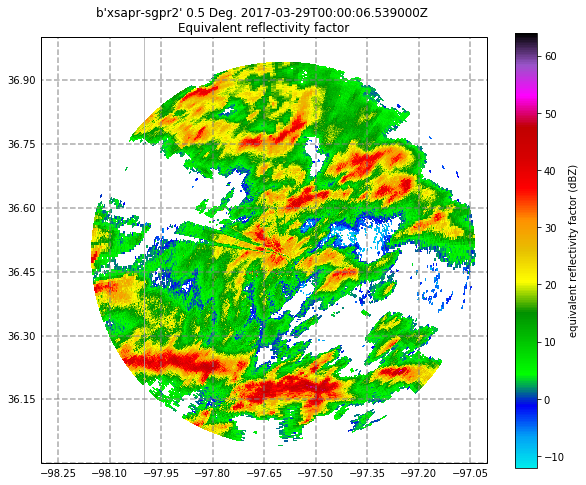

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:47.480318. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [9]:
fig = plt.figure(figsize = [10,8])

max_lat = 37
min_lat = 36
min_lon = -98.3
max_lon = -97

lal = np.arange(min_lat, max_lat, .2)
lol = np.arange(min_lon, max_lon, .2)

display = pyart.graph.RadarMapDisplayCartopy(radar)

projection = cartopy.crs.Mercator(
                central_longitude=(min_lon+max_lon)/2.0,
                min_latitude=min_lat, max_latitude=max_lat)

display.plot_ppi_map(
    'reflectivity', 0, colorbar_flag=True,
    projection=projection,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-12, vmax=64, gatefilter = my_gate_filter)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False



In [10]:
print(radar.fields['reflectivity']['data'][my_gate_filter.gate_included].mean())

13.6512346413


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:49.233293. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
gate_height = radar.gate_z['data']
heights = np.linspace(400,15400,16 )
dh = heights[1]- heights[0]
mean_z = np.zeros(len(heights))
mean_zdr = np.zeros(len(heights))
z_e = radar.fields['reflectivity']['data']
zdr = radar.fields['differential_reflectivity']['data']
for i in range(len(heights)):
    gates_above = gate_height > heights[i] - dh
    gates_below = gate_height < heights[i] + dh
    gates_in_the_sandwich = np.logical_and(gates_above, gates_below)
    valid_gates_in_the_sandwich = np.logical_and(gates_in_the_sandwich, 
                                                 my_gate_filter.gate_included)
    this_mean = z_e[valid_gates_in_the_sandwich].mean()
    this_mean_zdr = zdr[valid_gates_in_the_sandwich].mean()
    mean_z[i] = this_mean
    mean_zdr[i] = this_mean_zdr


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:49.272749. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


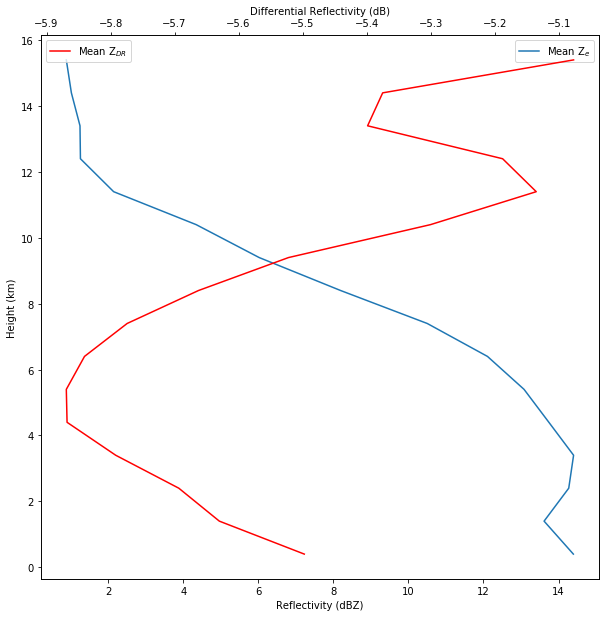

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:50.831919. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [12]:
fig = plt.figure(figsize = [10,10])
plt.plot(mean_z, heights/1000.0, label = 'Mean Z$_{e}$')
plt.ylabel('Height (km)')
plt.xlabel('Reflectivity (dBZ)')
plt.legend()
ax2 = plt.twiny()
plt.plot(mean_zdr, heights/1000.0, 'r-', label = 'Mean Z$_{DR}$')
plt.xlabel('Differential Reflectivity (dB)')
plt.legend()


In [13]:
#Now our nifty fetch script
#Helper function for the search
def _nearestDate(dates, pivot):
    return min(dates, key=lambda x: abs(x - pivot))


def get_radar_from_aws(site, datetime_t):
    """
    Get the closest volume of NEXRAD data to a particular datetime.
    Parameters
    ----------
    site : string
        four letter radar designation
    datetime_t : datetime
        desired date time
    Returns
    -------
    radar : Py-ART Radar Object
        Radar closest to the queried datetime
    """

    # First create the query string for the bucket knowing
    # how NOAA and AWS store the data
    my_pref = datetime_t.strftime('%Y/%m/%d/') + site

    # Connect to the bucket
    conn = S3Connection(anon = True)
    bucket = conn.get_bucket('noaa-nexrad-level2')

    # Get a list of files
    bucket_list = list(bucket.list(prefix = my_pref))

    # we are going to create a list of keys and datetimes to allow easy searching
    keys = []
    datetimes = []

    # populate the list
    for i in range(len(bucket_list)):
        this_str = str(bucket_list[i].key)
        if 'gz' in this_str:
            endme = this_str[-22:-4]
            fmt = '%Y%m%d_%H%M%S_V0'
            dt = datetime.strptime(endme, fmt)
            datetimes.append(dt)
            keys.append(bucket_list[i])

        if this_str[-3::] == 'V06':
            endme = this_str[-19::]
            fmt = '%Y%m%d_%H%M%S_V06'
            dt = datetime.strptime(endme, fmt)
            datetimes.append(dt)
            keys.append(bucket_list[i])

    # find the closest available radar to your datetime
    closest_datetime = _nearestDate(datetimes, datetime_t)
    index = datetimes.index(closest_datetime)

    localfile = tempfile.NamedTemporaryFile()
    keys[index].get_contents_to_filename(localfile.name)
    radar = pyart.io.read(localfile.name)
    return radar

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:51.636708. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
time_at_start_of_radar = num2date(radar.time['data'][0], 
                                      radar.time['units'])
my_radar = get_radar_from_aws('KVNX', time_at_start_of_radar )

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:32:51.678583. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


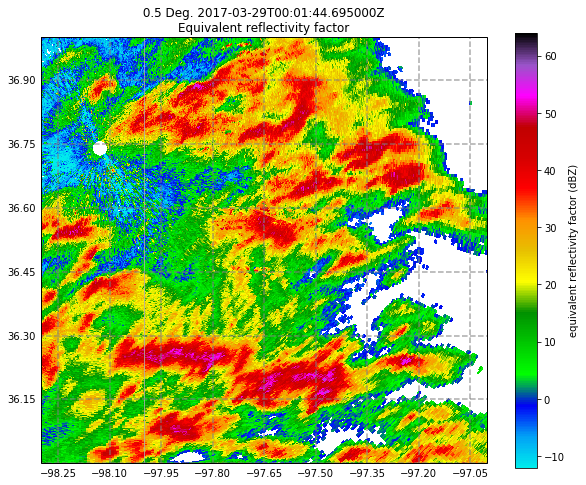

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:33:12.139853. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [15]:
fig = plt.figure(figsize = [10,8])

max_lat = 37
min_lat = 36
min_lon = -98.3
max_lon = -97

lal = np.arange(min_lat, max_lat, .2)
lol = np.arange(min_lon, max_lon, .2)

display = pyart.graph.RadarMapDisplayCartopy(my_radar)

projection = cartopy.crs.Mercator(
                central_longitude=(min_lon+max_lon)/2.0,
                min_latitude=min_lat, max_latitude=max_lat)

display.plot_ppi_map(
    'reflectivity', 0, colorbar_flag=True,
    projection=projection,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-12, vmax=64)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False



In [16]:
vance_my_gate_filter = pyart.filters.GateFilter(my_radar)
vance_my_gate_filter.include_all()
vance_my_gate_filter.exclude_below('cross_correlation_ratio', 0.8)
#my_gate_filter.exclude_below('total_power', 0.)


gate_height = my_radar.gate_z['data']
heights = np.linspace(400,15400,16 )
dh = heights[1]- heights[0]
vance_mean_z = np.zeros(len(heights))
vance_mean_zdr = np.zeros(len(heights))
z_e = my_radar.fields['reflectivity']['data']
zdr = my_radar.fields['differential_reflectivity']['data']
for i in range(len(heights)):
    gates_above = gate_height > heights[i] - dh
    gates_below = gate_height < heights[i] + dh
    gates_in_the_sandwich = np.logical_and(gates_above, gates_below)
    valid_gates_in_the_sandwich = np.logical_and(gates_in_the_sandwich, 
                                                 vance_my_gate_filter.gate_included)
    this_mean = z_e[valid_gates_in_the_sandwich].mean()
    this_mean_zdr = zdr[valid_gates_in_the_sandwich].mean()
    vance_mean_z[i] = this_mean
    vance_mean_zdr[i] = this_mean_zdr

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:33:17.852374. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


(0, 2)

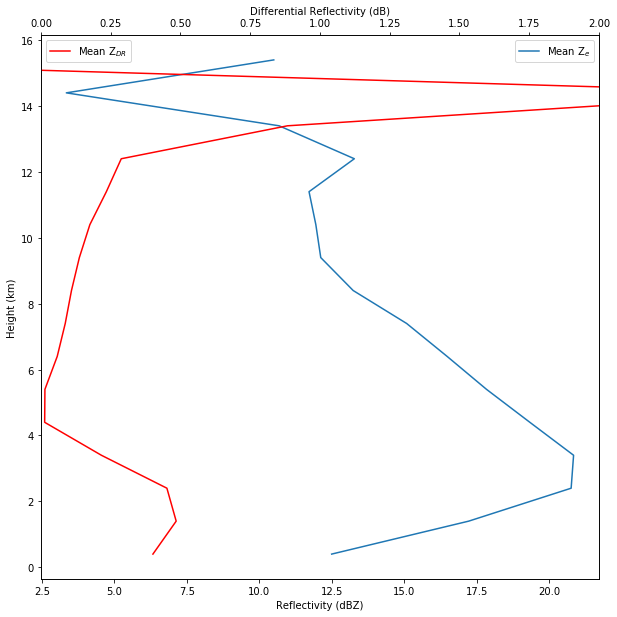

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-11 07:33:23.649753. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [17]:
fig = plt.figure(figsize = [10,10])
plt.plot(vance_mean_z, heights/1000.0, label = 'Mean Z$_{e}$')
plt.ylabel('Height (km)')
plt.xlabel('Reflectivity (dBZ)')
plt.legend()
ax2 = plt.twiny()
plt.plot(vance_mean_zdr, heights/1000.0, 'r-', label = 'Mean Z$_{DR}$')
plt.xlabel('Differential Reflectivity (dB)')
plt.legend(loc=2)
plt.xlim([0,2])
